https://www.kaggle.com/code/mariosfish/car-evaluation-lr-dt-nn/notebook

In [1]:
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, classification_report

In [24]:
data = pd.read_csv("CSV/car_evaluation.csv")
print(data.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [3]:
data.shape

(1727, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
print("The data set has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The data set has 1727 rows and 7 columns.


In [6]:
data.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [7]:
# Check for missing values.
data.isna().any()

vhigh      False
vhigh.1    False
2          False
2.1        False
small      False
low        False
unacc      False
dtype: bool

In [11]:
# Check for duplicate rows.
data.duplicated().any()

False

In [27]:
data.columns = ["buying","maint","doors","persons","lug_boot","safety","class_val"]

In [12]:
# Checking the values from each column.
for col in data.columns:
    print("Column:", col)
    print(data[col].value_counts(),'\n')

Column: buying
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

Column: maint
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

Column: doors
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64 

Column: persons
persons
4       576
more    576
2       575
Name: count, dtype: int64 

Column: lug_boot
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64 

Column: safety
safety
med     576
high    576
low     575
Name: count, dtype: int64 

Column: class_val
class_val
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64 



In [13]:
# Plotting the values of each column.
for i in data.columns:
    labels = data[i].unique()
    values = data[i].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=go.layout.Title(text='Value distribution for column: "{}"'.format(i),x=.5))
    fig.show()

In [28]:
data.dtypes

buying       object
maint        object
doors        object
persons      object
lug_boot     object
safety       object
class_val    object
dtype: object

In [29]:
# Create category types.
buying_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
maint_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
doors_type = CategoricalDtype(['2','3','4','5more'], ordered=True)
persons_type = CategoricalDtype(['2','4','more'], ordered=True)
lug_boot_type = CategoricalDtype(['small','med','big'], ordered=True)
safety_type = CategoricalDtype(['low','med','high'], ordered=True)
class_type = CategoricalDtype(['unacc','acc','good','vgood'], ordered=True)

# Convert all categorical values to category type.
data.buying = data.buying.astype(buying_type)
data.maint = data.maint.astype(maint_type)
data.doors = data.doors.astype(doors_type)
data.persons = data.persons.astype(persons_type)
data.lug_boot = data.lug_boot.astype(lug_boot_type)
data.safety = data.safety.astype(safety_type)
data.class_val = data.class_val.astype(class_type)

In [30]:
# Convert categories into integers for each column.
data.buying=data.buying.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
data.maint=data.maint.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
data.doors=data.doors.replace({'2':0, '3':1, '4':2, '5more':3})
data.persons=data.persons.replace({'2':0, '4':1, 'more':2})
data.lug_boot=data.lug_boot.replace({'small':0, 'med':1, 'big':2})
data.safety=data.safety.replace({'low':0, 'med':1, 'high':2})
data.class_val=data.class_val.replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

In [31]:
# The data set after the conversion.
print(data.head())

  buying maint doors persons lug_boot safety class_val
0      3     3     0       0        0      1         0
1      3     3     0       0        0      2         0
2      3     3     0       0        1      0         0
3      3     3     0       0        1      1         0
4      3     3     0       0        1      2         0


In [23]:
data.dtypes

buying       category
maint        category
doors        category
persons      category
lug_boot     category
safety       category
class_val    category
dtype: object

In [20]:
data['buying'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3], ordered=True, categories_dtype=int64)

Text(0.5, 1.0, 'Correlation matrix')

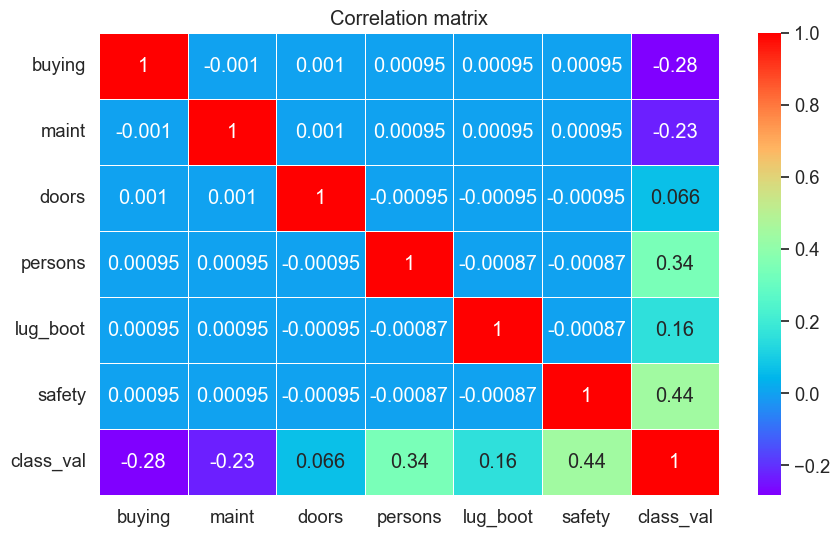

In [48]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True, cmap='rainbow',linewidth=0.5, square=False)
plt.title('Correlation matrix')

In [49]:
# Choose attribute columns and class column.
X=data[data.columns[:-1]]
y=data['class_val']

In [50]:
# Split to train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Initialize a Logistic Regression classifier.
logreg=LogisticRegression(solver='saga', multi_class='auto', random_state=42, n_jobs=-1)

# Train the classifier.
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='auto', n_jobs=-1, random_state=42,
                   solver='saga')

In [52]:
# Make predictions.
log_pred=logreg.predict(X_test)

# CV score
logreg_cv = cross_val_score(logreg,X_train,y_train,cv=10)

In [53]:
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, log_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, log_pred))

# Explained variance score: 1 is perfect prediction.
print('Accuracy: %.3f' % logreg.score(X_test, y_test))

# CV Accuracy
print('CV Accuracy: %.3f' % logreg_cv.mean())

Mean squared error (MSE): 0.268
Mean absolute error (MAE): 0.198
Accuracy: 0.830
CV Accuracy: 0.820


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

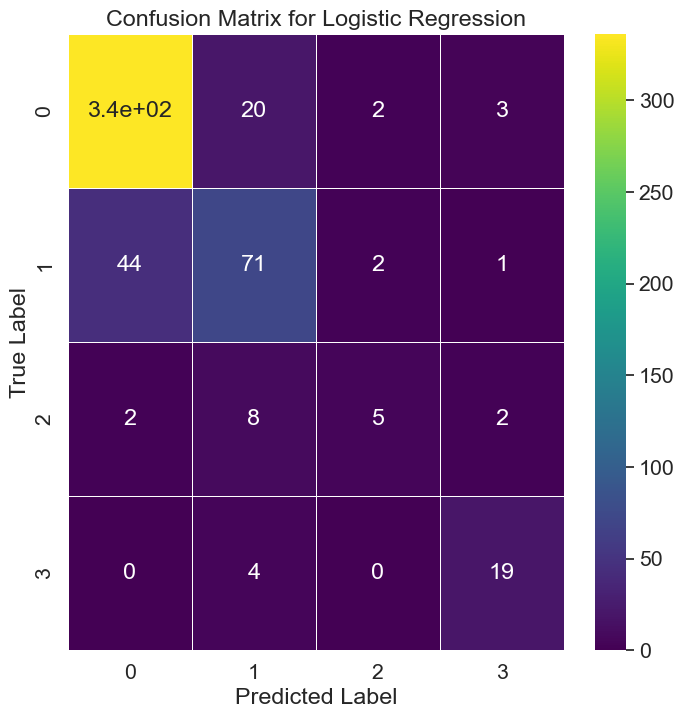

In [59]:
# Plot confusion matrix for Logistic regression.
logreg_matrix = confusion_matrix(y_test,log_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(logreg_matrix,annot=True, cbar=True, cmap='viridis',linewidth=0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression')

In [60]:
# Hyperparameters to be checked.
parameters = {'C':[0.0001,0.001, 0.01, 1, 0.1, 10, 100, 1000],
              'penalty':['none','l2'],
              'solver':['lbfgs','sag','saga','newton-cg']
             }

# Logistic Regression classifier.
default_logreg=LogisticRegression(multi_class='auto', random_state=42, n_jobs=-1)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='auto', n_jobs=-1,
                                          random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             verbose=1)

In [61]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(X_test)

In [62]:
# Best parameters.
print("Best Logistic Regression Parameters: {}".format(gs_logreg.best_params_))

# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_log_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_log_pred))

# Cross validation accuracy for the best parameters.
print('CV Accuracy: %0.3f' % gs_logreg.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_logreg.score(X_test,y_test)))

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Mean squared error (MSE): 0.264
Mean absolute error (MAE): 0.195
CV Accuracy: 0.825
Accuracy: 0.834


Text(0.5, 1.0, 'Confusion Matrix \nfor GridSearchCV Logistic Regression')

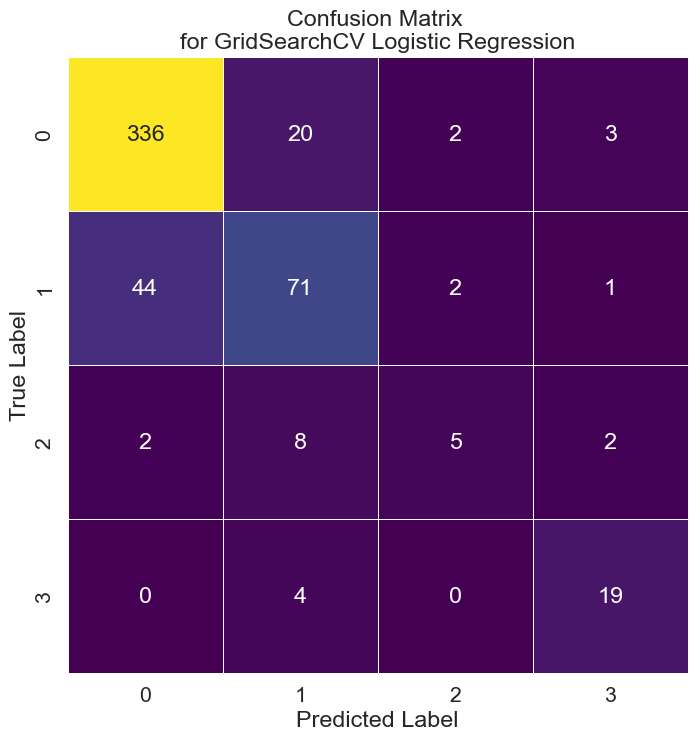

In [63]:
# Plot confusion matrix for GridSearchCV Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,log_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='viridis',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix \nfor GridSearchCV Logistic Regression')

In [64]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [67]:
# Print the tree in a simplified version.
r = export_text(tr, feature_names=X.columns.tolist())
print(r)

|--- safety <= 0.50
|   |--- class: 0
|--- safety >  0.50
|   |--- persons <= 0.50
|   |   |--- class: 0
|   |--- persons >  0.50
|   |   |--- buying <= 1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- safety >  1.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- maint >  1.50
|   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- safety >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- buying >  1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- lug_boot <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lug_boot >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- maint >  1.50
|   |   |   |   |--- buying <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- buying >  2.50
|   |   |   |   |   |--- class: 0



In [68]:
# Make predictions.
tr_pred=tr.predict(X_test)

# CV score
tr_cv = cross_val_score(tr,X_train,y_train,cv=10)

In [69]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, tr_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, tr_pred))

# Explained variance score: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# CV Accuracy
print('CV Accuracy: %.3f' % tr_cv.mean())

Mean squared error (MSE): 0.193
Mean absolute error (MAE): 0.150
Accuracy: 0.871
CV Accuracy: 0.861


Text(0.5, 1.0, 'Confusion Matrix for Decision tree')

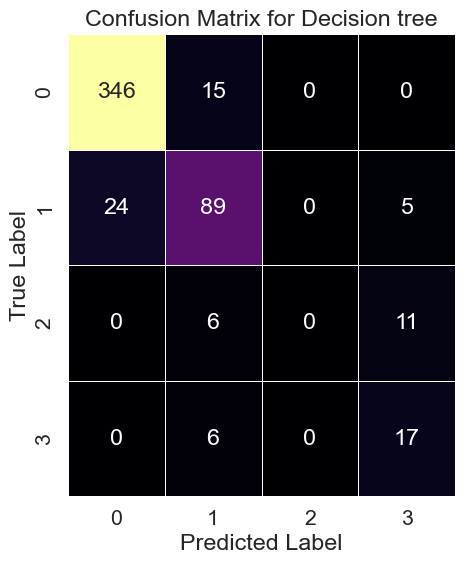

In [71]:
# Print confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
plt.figure(figsize=(5,6))
sns.set(font_scale=1.4)
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='inferno',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree')

In [72]:
# Hyperparameters to be checked.
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# Default Decision tree estimator.
default_tr = tree.DecisionTreeClassifier(random_state=42)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [73]:
# Make predictions with the best parameters.
gs_tree_pred=gs_tree.predict(X_test)

In [74]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_tree_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_tree_pred))

# Cross validation accuracy for the best parameters.
print('CV accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

Best Decision tree Parameters: {'criterion': 'gini', 'max_depth': 11}
Mean squared error (MSE): 0.046
Mean absolute error (MAE): 0.039
CV accuracy: 0.983
Accuracy: 0.965


Text(0.5, 1.0, 'Confusion Matrix for GridSearchCV Decision tree')

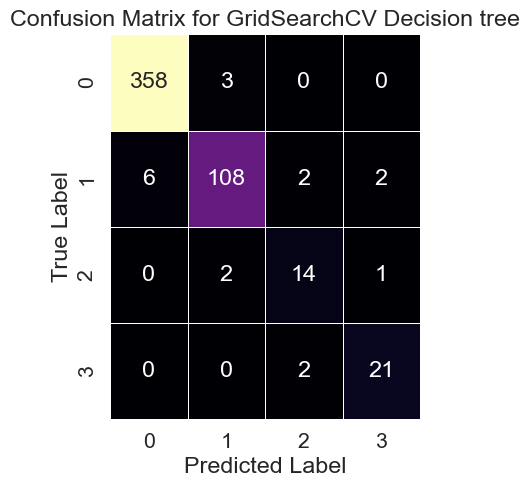

In [77]:
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
plt.figure(figsize=(4,5))
sns.set(font_scale=1.4)
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='magma', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree')

In [78]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000, random_state=42, shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=42)

In [79]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

# CV score
mlp_cv = cross_val_score(mlp,X_train,y_train,cv=10)

In [80]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, mlp_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, mlp_pred))

# Explained variance score: 1 is perfect prediction.
print('Accuracy: %.3f' % mlp.score(X_test, y_test))

# CV Accuracy
print('CV Accuracy: %.3f' % mlp_cv.mean())

Mean squared error (MSE): 0.123
Mean absolute error (MAE): 0.100
Accuracy: 0.911
CV Accuracy: 0.924


Text(0.5, 1.0, 'Confusion Matrix for MLP')

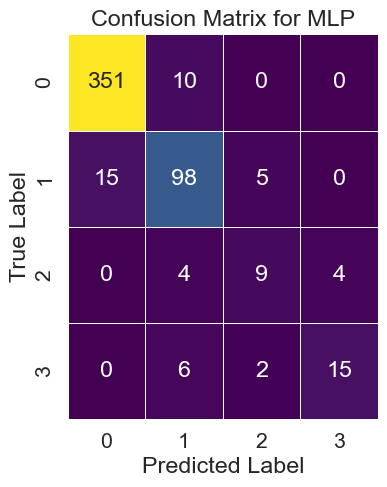

In [83]:
# Plot confusion matrix for MLP.
mlp_matrix = confusion_matrix(y_test,mlp_pred)
plt.figure(figsize=(4,5))
sns.set(font_scale=1.4)
sns.heatmap(mlp_matrix,annot=True, cbar=False, cmap='viridis',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for MLP')

In [84]:
# Hyperparameters to be checked.
parameters = {'activation':['logistic','tanh','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'alpha':10.0 ** -np.arange(1,3),
              'hidden_layer_sizes':[(5),(100),(3),(4),(3,1),(5,3)]}

# MLP estimator.
default_mlp = MLPClassifier(random_state=42)

# GridSearchCV estimator.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_mlp.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([0.1 , 0.01]),
                         'hidden_layer_sizes': [5, 100, 3, 4, (3, 1), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=1)

In [85]:
# Make predictions with the best parameters.
gs_mlp_pred=gs_mlp.predict(X_test)

In [86]:
# Best parameters.
print("Best MLP Parameters: {}".format(gs_mlp.best_params_))

# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_mlp_pred))

# Explained average absolute error (average error).
print("Average absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_mlp_pred))

# Cross validation accuracy for the best parameters.
print('CV accuracy: %0.3f' % gs_mlp.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_mlp.score(X_test,y_test)))

Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}
Mean squared error (MSE): 0.012
Average absolute error (MAE): 0.008
CV accuracy: 0.991
Accuracy: 0.994


Text(0.5, 1.0, 'Confusion Matrix for GridSearchCV MLP')

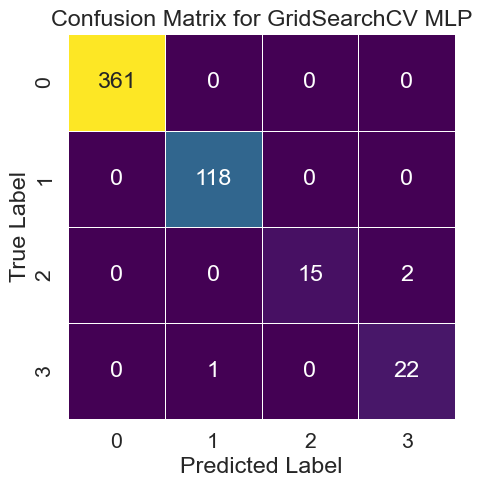

In [91]:
gs_mlp_matrix = confusion_matrix(y_test,gs_mlp_pred)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(gs_mlp_matrix,annot=True, cbar=False, cmap='viridis',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV MLP')

In [93]:
errors=['Accuracy','CV-accuracy','MSE', 'MAE']

fig = go.Figure(data=[
    go.Bar(name='Logistic Regression', x=errors, y=[logreg.score(X_test, y_test),logreg_cv.mean(),mean_squared_error(y_test, log_pred), mean_absolute_error(y_test, log_pred)]),
    go.Bar(name='Decision tree', x=errors, y=[tr.score(X_test, y_test),tr_cv.mean(),mean_squared_error(y_test, tr_pred), mean_absolute_error(y_test, tr_pred)]),
    go.Bar(name='MLP', x=errors, y=[mlp.score(X_test, y_test),mlp_cv.mean(),mean_squared_error(y_test, mlp_pred), mean_absolute_error(y_test, mlp_pred)]),
    go.Bar(name='GridSearchCV+Logistic Regression', x=errors, y=[gs_logreg.score(X_test, y_test),gs_logreg.best_score_,mean_squared_error(y_test, gs_log_pred), mean_absolute_error(y_test, gs_log_pred)]),
    go.Bar(name='GridSearchCV+Decision tree', x=errors, y=[gs_tree.score(X_test, y_test),gs_tree.best_score_,mean_squared_error(y_test, gs_tree_pred), mean_absolute_error(y_test, gs_tree_pred)]),
    go.Bar(name='GridSearchCV+MLP', x=errors, y=[gs_mlp.score(X_test, y_test),gs_mlp.best_score_,mean_squared_error(y_test, gs_mlp_pred), mean_absolute_error(y_test, gs_mlp_pred)])
])
fig.update_layout(
    title='Metrics for each model',
    xaxis_tickfont_size=14,    
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [94]:
d={
'': ['Logistic Regression','GridSearchCV + Logistic Regression','Decision Tree','GridSearchCV + Decision Tree','Neural Network (MLP)','GridSearchCV + Neural Network (MLP)'],
'Accuracy': [logreg.score(X_test, y_test), gs_logreg.score(X_test,y_test),tr.score(X_test, y_test),gs_tree.score(X_test,y_test),mlp.score(X_test, y_test),gs_mlp.score(X_test, y_test)],
'CV Accuracy': [logreg_cv.mean(), gs_logreg.best_score_, tr_cv.mean(),gs_tree.best_score_,mlp_cv.mean(),gs_mlp.best_score_],
'MSE': [mean_squared_error(y_test, log_pred),mean_squared_error(y_test, gs_log_pred),mean_squared_error(y_test, tr_pred), mean_squared_error(y_test, gs_tree_pred),mean_squared_error(y_test, mlp_pred),mean_squared_error(y_test, gs_mlp_pred)],
'MAE': [mean_absolute_error(y_test, log_pred),mean_absolute_error(y_test, gs_log_pred),mean_absolute_error(y_test, tr_pred), mean_absolute_error(y_test, gs_tree_pred),mean_absolute_error(y_test, mlp_pred),mean_absolute_error(y_test, gs_mlp_pred)]
}

results=pd.DataFrame(data=d).round(3).set_index('')
results

,Accuracy,CV Accuracy,MSE,MAE
,,,,
Logistic Regression,0.830,0.820,0.268,0.198
GridSearchCV + Logistic Regression,0.834,0.825,0.264,0.195
Decision Tree,0.871,0.861,0.193,0.150
GridSearchCV + Decision Tree,0.965,0.983,0.046,0.039
Neural Network (MLP),0.911,0.924,0.123,0.100
GridSearchCV + Neural Network (MLP),0.994,0.991,0.012,0.008
